<figure>
  <IMG SRC="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" WIDTH=200 ALIGN="right">
</figure>
<figure>
  <IMG SRC="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" WIDTH=200 ALIGN="right">
</figure>

# CEGM1000 Modelling, Uncertainty and Data for Engineers
    
## Sensing and observation theory

In this notebook you will fit several models to a time series of height observations of a point on a glacier, to assess whether it is melting. 

**Learning objectives:**
- set-up an observation model
- apply least-squares estimation
- assess the estimation results considering redundancy, squared norm of residuals, under- and overfitting

You have 12 monthly measurements of the height of a point on a glacier. The measurements are obtained from a satellite laser altimeter.

- Time [months]: $[0, 1, 2, \ldots, 11]$
- Observed heights [meters]: $[102.4, 98.2, 97.5, 97.9, 99.7, 100.7, 98.3, 94.2, 90.9, 86.1, 81.2, 76.9]$

We will consider three different models, with the following observation equations:

- Model 1: constant velocity, $\mathbb{E}\left( Y_i \right) = x_0 + x_1 t_i$
- Model 2: eight order polynomial, $\mathbb{E}\left( Y_i \right) =x_0 + x_1 t_i + x_2 t_i^2 +\ldots+ x_8 t_i^8 = \sum_{p=0}^8 x_p t_i^p $
- Model 3: constant velocity + annual signal, $\mathbb{E}\left( Y_i \right) = x_0 + x_1 t_i + x_2 cos \Big(\frac{2 \pi t_i}{12} \Big)$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## 0. Observed heights and times of observations

Times of observations, observed heights and number of observations are given:

In [11]:
# times of observation [months]
t = np.arange(12)

# observed heights [m]
y = [102.4, 98.2, 97.5, 97.9, 99.7, 100.7, 98.3, 94.2, 90.9, 86.1, 81.2, 76.9]

# number of observations
m = len(t)

## Observation model

Our **functional model** is to be defined in a form
$$
\mathbb{E}\left(Y\right) = \mathbb{E}(\begin{bmatrix}Y_1\\Y_2\\ \vdots \\ Y_m \end{bmatrix})= \mathrm{A}\cdot \begin{bmatrix}x_1\\x_2\\ \vdots \\ x_n \end{bmatrix} = \mathrm{A}\cdot \mathrm{x}
$$
The functional model can also be written as:
$$ Y = \mathrm{A}\cdot \mathrm{x} + \epsilon\;\text{with}\; \epsilon \sim N(0,\Sigma_{\epsilon}) $$
The random errors $\epsilon$ are thus assumed to be normally distributed with zero mean and covariance matrix $\Sigma_{\epsilon}$, which describes the *precision* of our observations, and is referred to as the **stochastic model**. For now we will not use the information about the stochastic model.

### Exercise 1. Create design matrices for the three models and determine redundancy for each

With ```column_stack``` you can combine arrays (column vectors) to create a matrix.

In [12]:
A_1 = np.column_stack((np.ones(m), t))
A_2 = np.column_stack((A_1, t**2, t**3, t**4, t**5, t**6, t**7, t**8))
A_3 = np.column_stack((np.ones(m), t, np.cos(2*np.pi*t/12)))

red_1 = m - np.shape(A_1)[1]
red_2 = m - np.shape(A_2)[1]
red_3 = m - np.shape(A_3)[1]

print(f'Redundancy of linear trend model: {red_1}')
print(f'Redundancy of 8th order polynomial model: {red_2}')
print(f'Redundancy of linear trend + annual signal model: {red_3}')

Redundancy of linear trend model: 10
Redundancy of 8th order polynomial model: 3
Redundancy of linear trend + annual signal model: 9


## Least-squares

The least-squares principle fits the model such that the sum of squared errors (residuals) is minimized, i.e., it finds the $\mathrm{x}=\begin{bmatrix} x_1 & x_2 & \ldots & x_n \end{bmatrix}^T$ by solving the following minimization problem:
$$
\underset{x}{\min} \| \mathrm{y} - \mathrm{A}\mathrm{x} \|^2 = (\mathrm{y} - \mathrm{A}\mathrm{x})^T(\mathrm{y} - \mathrm{A}\mathrm{x}) = \underset{i=1}{\overset{m}\sum} \epsilon_i^2
$$
Note that we use a small letter $\mathrm{y}$ here, since we are now using the actual observed values (i.e., a realization of $Y$).

The solution $\hat{\mathrm{x}}$ is obtained as:
$$
\hat{\mathrm{x}} = \left(\mathrm{A}^T\mathrm{A} \right)^{-1} \mathrm{A}^T\mathrm{y}
$$
Hence, $\hat{\mathrm{x}}$ is the <b>estimate</b> of $\mathrm{x}$ which gives the smallest possible sum of squared residuals.

### Exercise 2. Find the least squares solution for each of the models

You can use the NumPy function ```linalg.inv``` to compute the inverse of a matrix. Recall that for a matrix product $\mathrm{A}\cdot \mathrm{B} $ you can use ```A @ B```.

In [13]:
xhat_1 = np.linalg.inv(A_1.T @ A_1) @ A_1.T @ y
xhat_2 = np.linalg.inv(A_2.T @ A_2) @ A_2.T @ y
xhat_3 = np.linalg.inv(A_3.T @ A_3) @ A_3.T @ y
print(xhat_1)
# or, if using np.dot for the matrix product instead of @:
#xhat1 = np.linalg.solve(np.dot(np.transpose(A1), A1), np.dot(np.transpose(A1), y))
#xhat2 = np.linalg.solve(np.dot(np.transpose(A2), A2), np.dot(np.transpose(A2), y))

[104.57435897  -1.98321678]


### Exercise 3. Evaluate the residuals

Calculate the squared norm of residuals for each of the models, and also make a plot of the individual residuals for each model.

Squared norm of residuals model 1: 176.066
Squared norm of residuals model 2: 0.713
Squared norm of residuals model 3: 9.998


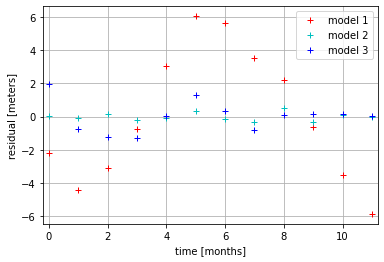

In [14]:
# Calculated the squared norm of residuals for the 3 models
eTe_1 = (y - A_1 @ xhat_1).T @ (y - A_1 @ xhat_1)
eTe_2 = (y - A_2 @ xhat_2).T @ (y - A_2 @ xhat_2)
eTe_3 = (y - A_3 @ xhat_3).T @ (y - A_3 @ xhat_3)

print(f'Squared norm of residuals model 1: {eTe_1:.3f}')
print(f'Squared norm of residuals model 2: {eTe_2:.3f}')
print(f'Squared norm of residuals model 3: {eTe_3:.3f}')
# ALTERNATIVES to compute the squared norms
# eTe_1 = np.linalg.norm(y - A_1 @ xhat_1)**2
# eTe_1 = np.dot(np.transpose(y - np.dot(A1, xhat1)), (y - np.dot(A1, xhat1)))

# Calculate residuals
res_1 = y - A_1 @ xhat_1
res_2 = y - A_2 @ xhat_2
res_3 = y - A_3 @ xhat_3

# Plot the residuals for the 3 models
plt.figure()
plt.plot(t, res_1, '+r', label='model 1')
plt.plot(t, res_2, '+c', label='model 2')
plt.plot(t, res_3, '+b', label='model 3')
plt.xlim(-0.2, 11.2)
plt.xlabel('time [months]')
plt.ylabel('residual [meters]')
plt.grid()
plt.legend(loc='best')
plt.show()

<div class="alert alert-block alert-warning"> 
    
### Do the residuals (see plot) behave as expected for each of the models
    
...
No, you would expect them to fluctuate randomly around zero, but especially for model 1 you can see a clear residual signal, which is an indication that the model is too simplistic.  
    
### Discuss why the squared norm of residuals is quite different for the 3 models:
...
The squared norm for model 1 is very large, due to the annual signal that is not accounted for. The squared norm for model 2 is very small, so it results in a very good fit (due to the high order of the polynomial). Model 3 results in a somewhat larger squared norm than model 2 - this is due to the additional parameters in model 2, which will result in a better fit (i.e., it allows to better capture the actual height variation over time).
    


</div>

### Exercise 4. Plot the observations and the three fitted models in one figure:

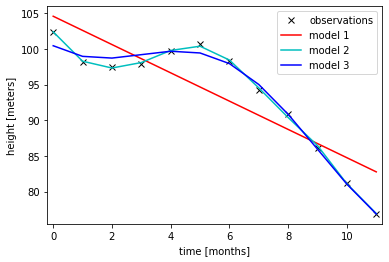

In [15]:
yhat_1 = A_1 @ xhat_1
yhat_2 = A_2 @ xhat_2
yhat_3 = A_3 @ xhat_3

plt.figure()
plt.plot(t, y, 'kx', label='observations')
plt.plot(t, yhat_1, color='r', label='model 1')
plt.plot(t, yhat_2, color='c', label='model 2')
plt.plot(t, yhat_3, color='b', label='model 3')
plt.xlim(-0.2, (m-1)+0.2)
plt.xlabel('time [months]')
plt.ylabel('height [meters]')
plt.legend(loc='best')
plt.show()

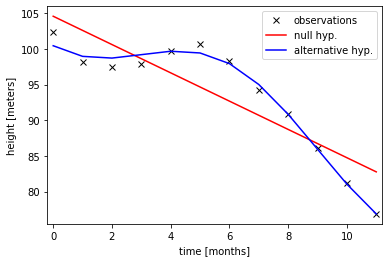

In [16]:
yhat_1 = A_1 @ xhat_1
yhat_2 = A_2 @ xhat_2
yhat_3 = A_3 @ xhat_3

plt.figure()
plt.plot(t, y, 'kx', label='observations')
plt.plot(t, yhat_1, color='r', label='null hyp.')
plt.plot(t, yhat_3, color='b', label='alternative hyp.')
plt.xlim(-0.2, (m-1)+0.2)
plt.xlabel('time [months]')
plt.ylabel('height [meters]')
plt.legend(loc='best')
plt.show()

<div class="alert alert-block alert-warning"> 
    
### What would happen if you would fit a 11th order polynomial?
...This would result in a perfect fit: $\mathrm{A}$ becomes a full-rank square matrix, such that $\hat{\mathrm{x}} = \mathrm{A}^{-1} \mathrm{y}$ and the residuals become 0.

### One of the models is *underfitting*. Try to reason what is meant by this and which model this applies to.
...Model 1 obviously does not capture the annual signal, so it is does not accurately describe the relation between observations and height change. This is referred to as underfitting.
       
### One of the models is *overfitting*. Try to reason what is meant by this and which model this applies to.  
...Model 2 is overfitting - it results in very small residuals since we include a lot of parameters, but what is the physical interpretation? Including higher orders will result in an even better fit (ultimately the perfect fit as discussed above). A big problem is that most likely this model will not be able to predict the height change for the future. This is illustrated in the figure below, where we predict the height for the coming 2 months, and see how the polynomial model predicts a very unrealistic increase in height.

### How could we assess whether model 3 is a good choice (this is a topic we will discuss later, but try to think for yourself how it could be done).
...You would somehow have to compare the size of the residuals with the precision as described by $\Sigma_{\epsilon}$. 
</div>

```{admonition} What would happen if you'd fit a 11th order polynomial?
:class: dropdown
This would result in a perfect fit: $\mathrm{A}$ becomes a full-rank square matrix, such that $\hat{\mathrm{x}} = \mathrm{A}^{-1} \mathrm{y}$ and the residuals become 0.
```

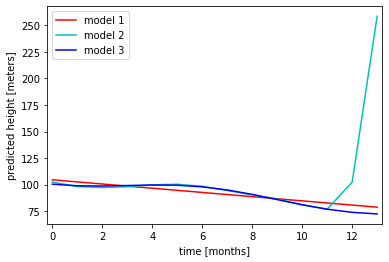

In [17]:
# create array with times
t_pred = np.arange(14)
m_pred = len(t_pred)

# create the A-matrices for the given times
A_pred_1 = np.column_stack((np.ones(m_pred), t_pred))
A_pred_2 = np.column_stack((A_pred_1, t_pred**2, t_pred**3, t_pred**4, t_pred**5, t_pred**6, t_pred**7, t_pred**8))
A_pred_3 = np.column_stack((np.ones(m_pred), t_pred, np.cos(2*np.pi*t_pred/12)))

# calculate predicted heights
model_1 = A_pred_1 @ xhat_1
model_2 = A_pred_2 @ xhat_2
model_3 = A_pred_3 @ xhat_3

# plot the predicted heights bases on the three models
plt.figure()
plt.plot(t_pred, model_1, color='r', label='model 1')
plt.plot(t_pred, model_2, color='c', label='model 2')
plt.plot(t_pred, model_3, color='b', label='model 3')
plt.xlim(-0.2, (m_pred-1)+0.2)
plt.xlabel('time [months]')
plt.ylabel('predicted height [meters]')
plt.legend(loc='best')
plt.show()